## Google Analytics Capstone project - Bellabeat

### Case Study 2:  How Can a Wellness Technology Company Play It Smart?


**Bellabeat** is a high-tech company that manufactures health-focused smart products (for more details visit <https://bellabeat.com/>). Collecting data on activity, sleep, stress, and reproductive health,  Bellabeat empowers women with knowledge about their own health and habits. Since it was founded in 2013, Bellabeat has grown rapidly and quickly positioned itself as a tech-driven wellness company for women.

### Data analytics process

In order to get a better understanding of the problem, I am going to develop the six phases of the analytic process:

* Ask
* Prepare
* Process
* Analyze
* Share
* Act

## 1 Ask phase

The problem that Bellabeat is trying to solve, based on data,is revealing marketing growth opportunities.

In order to do that I need to know:

* Is there any trends in smart device usage?
* How could these trends apply to Bellabeat customers?
* How could these trends help influence Bellabeat marketing strategy?

I am going to  produce a report with the following deliverables:

* A clear summary of the business task
* A description of all data sources used
* Documentation of any cleaning or manipulation of data
* A summary of your analysis
* Supporting visualizations and key findings
* Your top high-level content recommendations based on your analysis

The key stakeholders of this business task are: Urška Sršen, Sando Mur and the Bellabeat marketing analytics team.

## 2 Prepare phase

I will use the **FitBit Fitness Tracker Data** database to acomplish the business task. This Kaggle data set contains personal fitness tracker from thirty fitbit users including information about daily activity, steps, and heart rate that can be used to explore users’ habits.

As mentioned before, this data set is stored in Kaggle. It is organized through 18 csv files containing information about: Activity, calories, intensities, steps and hartrate along days, hours and minutes. It also contains information about sleeping time and weight of the person.

This dataset doesn´t ROOCC because one of it characteristics does not past the test:

* Reliable: **Aproved** - It is a Kaggle public dataset with information provided by the aproval of the users.
* Original: **Aproved** - The dataset is not from a third party agency or stolen.
* Comprehensive: **Aproved** -Contains a lot of information.
* Current: **Disaproved** - The period of this dataset is between 03.12.2016-05.12.2016 which is quiet old.
* Cited: **Aproved** - These datasets were generated by respondents to a distributed survey via Amazon Mechanical Turk

It seems that there is no problem with the data or with it´s consistentcy.

## 3 Process phase

I will use R in order to gain information and make visualizations with the datasets provided.

### 3.1 Loading packages

First thing first, I need to load some open packages to process an analyse the data:

* Tidyverse
* Skimr
* Tidyr
* Ggplot2

In [1]:
library(ggpubr)
library(tidyverse)
library(here)
library(skimr)
library(janitor)
library(lubridate)

Loading required package: ggplot2

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

here() starts at /kaggle/working


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




### 3.2 Importing datasets

After loading the packages, I´m going to import the data. Although this excercise contains 18 datasets I won´t use all of them because, refering to the ask phase, Bellabeat want to make marketing strategys to growth.

Previewing the datasets I can conclude the following points:

* Daily information: DailyActivity_merged contains the daily merged information about: Id, calories, intensities and steps. So that I definitely need this dataset.
* Hourly information: This is going to be necessarily to get a depper understanding of the data. The calories, intensitie and steps are not merged as the daily activitie so that I will need to merge this datasets.
* Heart Rate: heartrate_seconds_merged: I am not going to load this dataset because having the daily and hourly activiy tracked in the first and second datasets is enough and loading another dataset won´t help.
* Minutes information: having insights in minute timeframe will add complexity to the model and won´t add value to the strategy.
* Sleep information: The sleepday_merged contains usefull information about the sleep time of the users that could help to set differents strategies.
* Weight information: I have some dubts with this dataset that I am going to explore further on.

In [2]:
daily_activity <- read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv')

hourly_calories <- read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv')
hourly_intensities <- read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv')
hourly_steps <- read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv')


sleep_day <- read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv')

weight_info <- read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv')

Rows: 940 Columns: 15

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 22099 Columns: 3

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityHour
dbl (2): Id, Calories


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 22099 Columns: 4

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityHour
dbl (3): Id, TotalIntensity, AverageIntensity


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `sho

Now that the datasets are loaded, I will explore the last one to see if it will add value to the task or not.

In [3]:
skim_without_charts(weight_info)

head(weight_info)

── Data Summary ────────────────────────
                           Values     
Name                       weight_info
Number of rows             67         
Number of columns          8          
_______________________               
Column type frequency:                
  character                1          
  logical                  1          
  numeric                  6          
________________________              
Group variables            None       

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate   min   max empty n_unique whitespace
1 Date                  0             1    19    21     0       56          0

── Variable type: logical ──────────────────────────────────────────────────────
  skim_variable  n_missing complete_rate  mean count           
1 IsManualReport         0             1 0.612 TRU: 41, FAL: 26

── Variable type: numeric ──────────────────────────────────────────────────────


Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,TRUE,1.462234e+12
1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,TRUE,1.462320e+12
1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,FALSE,1.460510e+12
2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,TRUE,1.461283e+12
2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,TRUE,1.463098e+12
4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,TRUE,1.460938e+12


Having only 67 rows and non unique Id´s, makes mee consider that this dataset could not be usefull. Lest´s explore more:

In [4]:
n_unique(weight_info$Id)

[1] 8

I knew it!! Having records of weight for only 8 people and some of them manually reported, I will not use this dataset.

### 3.4 Viewing the datasets

So let´s continue analysing the other datasets:

In [5]:
skim_without_charts(daily_activity)

head(daily_activity)

── Data Summary ────────────────────────
                           Values        
Name                       daily_activity
Number of rows             940           
Number of columns          15            
_______________________                  
Column type frequency:                   
  character                1             
  numeric                  14            
________________________                 
Group variables            None          

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate   min   max empty n_unique whitespace
1 ActivityDate          0             1     8     9     0       31          0

── Variable type: numeric ──────────────────────────────────────────────────────
   skim_variable            n_missing complete_rate    mean      sd         p0
 1 Id                               0             1 4.86e+9 2.42e+9 1503960366
 2 TotalSteps                       0             1 7.64e+3 5

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


In [6]:
skim_without_charts(hourly_calories)

head(hourly_calories)

skim_without_charts(hourly_intensities)

head(hourly_intensities)

skim_without_charts(hourly_steps)

head(hourly_steps)

── Data Summary ────────────────────────
                           Values         
Name                       hourly_calories
Number of rows             22099          
Number of columns          3              
_______________________                   
Column type frequency:                    
  character                1              
  numeric                  2              
________________________                  
Group variables            None           

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate   min   max empty n_unique whitespace
1 ActivityHour          0             1    19    21     0      736          0

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable n_missing complete_rate         mean           sd         p0
1 Id                    0             1 4848235270.  2422500401.  1503960366
2 Calories              0             1         97.4   

Id,ActivityHour,Calories
<dbl>,<chr>,<dbl>
1503960366,4/12/2016 12:00:00 AM,81
1503960366,4/12/2016 1:00:00 AM,61
1503960366,4/12/2016 2:00:00 AM,59
1503960366,4/12/2016 3:00:00 AM,47
1503960366,4/12/2016 4:00:00 AM,48
1503960366,4/12/2016 5:00:00 AM,48


── Data Summary ────────────────────────
                           Values            
Name                       hourly_intensities
Number of rows             22099             
Number of columns          4                 
_______________________                      
Column type frequency:                       
  character                1                 
  numeric                  3                 
________________________                     
Group variables            None              

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate   min   max empty n_unique whitespace
1 ActivityHour          0             1    19    21     0      736          0

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable    n_missing complete_rate    mean      sd         p0        p25
1 Id                       0             1 4.85e+9 2.42e+9 1503960366 2320127002
2 TotalIntensity 

Id,ActivityHour,TotalIntensity,AverageIntensity
<dbl>,<chr>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,20,0.333333
1503960366,4/12/2016 1:00:00 AM,8,0.133333
1503960366,4/12/2016 2:00:00 AM,7,0.116667
1503960366,4/12/2016 3:00:00 AM,0,0.000000
1503960366,4/12/2016 4:00:00 AM,0,0.000000
1503960366,4/12/2016 5:00:00 AM,0,0.000000


── Data Summary ────────────────────────
                           Values      
Name                       hourly_steps
Number of rows             22099       
Number of columns          3           
_______________________                
Column type frequency:                 
  character                1           
  numeric                  2           
________________________               
Group variables            None        

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate   min   max empty n_unique whitespace
1 ActivityHour          0             1    19    21     0      736          0

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable n_missing complete_rate        mean          sd         p0
1 Id                    0             1 4848235270. 2422500401. 1503960366
2 StepTotal             0             1        320.        690.          0
         p25  

Id,ActivityHour,StepTotal
<dbl>,<chr>,<dbl>
1503960366,4/12/2016 12:00:00 AM,373
1503960366,4/12/2016 1:00:00 AM,160
1503960366,4/12/2016 2:00:00 AM,151
1503960366,4/12/2016 3:00:00 AM,0
1503960366,4/12/2016 4:00:00 AM,0
1503960366,4/12/2016 5:00:00 AM,0


In [7]:
skim_without_charts(sleep_day)

head(sleep_day)

── Data Summary ────────────────────────
                           Values   
Name                       sleep_day
Number of rows             413      
Number of columns          5        
_______________________             
Column type frequency:              
  character                1        
  numeric                  4        
________________________            
Group variables            None     

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate   min   max empty n_unique whitespace
1 SleepDay              0             1    20    21     0       31          0

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable      n_missing complete_rate          mean      sd         p0
1 Id                         0             1 5000979403.   2.06e+9 1503960366
2 TotalSleepRecords          0             1          1.12 3.46e-1          1
3 TotalMinutesAsleep         0     

Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320


### 3.5 Cleaning and formatting

Before going to the analyse phase, let´s make sure that the datasets are clean and with the right format.

#### 3.5.1 Duplicates

Let´s check if there are some duplicates in the datasets.

In [8]:
sum(duplicated(daily_activity))
sum(duplicated(hourly_calories))
sum(duplicated(hourly_intensities))
sum(duplicated(hourly_steps))
sum(duplicated(sleep_day))

[1] 0

[1] 0

[1] 0

[1] 0

[1] 3

#### 3.5.2 Remove duplicates

As seen in the previous code, the sleep_day dataset has 3 records duplicated.

In [9]:
sleep_day <- sleep_day %>% distinct()

sum(duplicated(sleep_day))

[1] 0

#### 3.5.3 Checking N/A values

Another thing that we need to do is to check for N/A values in order to make sure the data is consistent.

In [10]:
sum(is.na(daily_activity))
sum(is.na(hourly_calories))
sum(is.na(hourly_intensities))
sum(is.na(hourly_steps))
sum(is.na(sleep_day))

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

#### 3.5.4 Clean column names

I consider that the names of the columns are right but in order to make sure that there are no empty spaces in the column names, I will run the clean_name function:

In [11]:
daily_activity <- clean_names(daily_activity)
hourly_calories <- clean_names(hourly_calories)
hourly_intensities <- clean_names(hourly_intensities)
hourly_steps <- clean_names(hourly_steps)
sleep_day <- clean_names(sleep_day)

#### 3.5.5 Renaming column names

In order to standarize the column names, I will use the same sintax for the date.

In [12]:
colnames(daily_activity)
colnames(hourly_calories)
colnames(hourly_intensities)
colnames(hourly_steps)
colnames(sleep_day)

[1] "id"                         "activity_date"             
 [3] "total_steps"                "total_distance"            
 [5] "tracker_distance"           "logged_activities_distance"
 [7] "very_active_distance"       "moderately_active_distance"
 [9] "light_active_distance"      "sedentary_active_distance" 
[11] "very_active_minutes"        "fairly_active_minutes"     
[13] "lightly_active_minutes"     "sedentary_minutes"         
[15] "calories"

[1] "id"            "activity_hour" "calories"

[1] "id"                "activity_hour"     "total_intensity"  
[4] "average_intensity"

[1] "id"            "activity_hour" "step_total"

[1] "id"                   "sleep_day"            "total_sleep_records" 
[4] "total_minutes_asleep" "total_time_in_bed"

In [13]:
hourly_calories <- rename(hourly_calories, activity_date = activity_hour)
hourly_intensities <- rename(hourly_intensities, activity_date = activity_hour)
hourly_steps <- rename(hourly_steps, activity_date = activity_hour)
sleep_day <- rename(sleep_day, activity_date = sleep_day)

#### 3.5.6 Converting to datetime columns

As shown at the begining of the 3.4 section (previsualizating the datasets), all of the datasets have a date column as characters. I need to change it to date-time.

In [14]:
daily_activity <- daily_activity %>% mutate(activity_date = as_date(activity_date, format = "%m/%d/%Y"))
hourly_calories <- hourly_calories %>% mutate(activity_date = as.POSIXct(activity_date,format ="%m/%d/%Y %I:%M:%S %p" , tz=Sys.timezone()))
hourly_intensities <- hourly_intensities %>% mutate(activity_date = as.POSIXct(activity_date,format ="%m/%d/%Y %I:%M:%S %p" , tz=Sys.timezone()))
hourly_steps <- hourly_steps %>% mutate(activity_date = as.POSIXct(activity_date,format ="%m/%d/%Y %I:%M:%S %p" , tz=Sys.timezone()))
sleep_day <- sleep_day %>% mutate(activity_date = as_date(activity_date, format = "%m/%d/%Y"))

Now, let´s check if the "activity_date" column are in date format:

In [15]:
str(daily_activity$activity_date)
str(hourly_calories$activity_date)
str(hourly_intensities$activity_date)
str(hourly_steps$activity_date)
str(sleep_day$activity_date)

 Date[1:940], format: "2016-04-12" "2016-04-13" "2016-04-14" "2016-04-15" "2016-04-16" ...
 POSIXct[1:22099], format: "2016-04-12 00:00:00" "2016-04-12 01:00:00" "2016-04-12 02:00:00" ...
 POSIXct[1:22099], format: "2016-04-12 00:00:00" "2016-04-12 01:00:00" "2016-04-12 02:00:00" ...
 POSIXct[1:22099], format: "2016-04-12 00:00:00" "2016-04-12 01:00:00" "2016-04-12 02:00:00" ...
 Date[1:410], format: "2016-04-12" "2016-04-13" "2016-04-15" "2016-04-16" "2016-04-17" ...


#### 3.5.7 Merging data

Now that the data is in the right format, is time to merge the hourly datasets:

In [16]:
a <- merge(hourly_calories,hourly_intensities, by=c("id","activity_date"))

hourly_activy <- merge(a,hourly_steps,by=c("id","activity_date"))

Let´s check how it look´s like:

In [17]:
head(hourly_activy)

,id,activity_date,calories,total_intensity,average_intensity,step_total
,<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>
1,1503960366,2016-04-12 00:00:00,81,20,0.333333,373
2,1503960366,2016-04-12 01:00:00,61,8,0.133333,160
3,1503960366,2016-04-12 02:00:00,59,7,0.116667,151
4,1503960366,2016-04-12 03:00:00,47,0,0.000000,0
5,1503960366,2016-04-12 04:00:00,48,0,0.000000,0
6,1503960366,2016-04-12 05:00:00,48,0,0.000000,0


## 4 Analyse and sharing phases

Now that I have ensure that the datasets are clean and ready, let´s go to the analyse phase in order to find patterns, relationships and trends that could reveal some strategies to make Bellabeat growth. Because the analyse and sharing (visualizations) phases are very concatenated, I will resume it in one section.

Let´s plot the most obvious relationship: the calories burnt versus the total amount of minutes active. To do this I have to make a new column summarizing the total amount of active minutes 


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



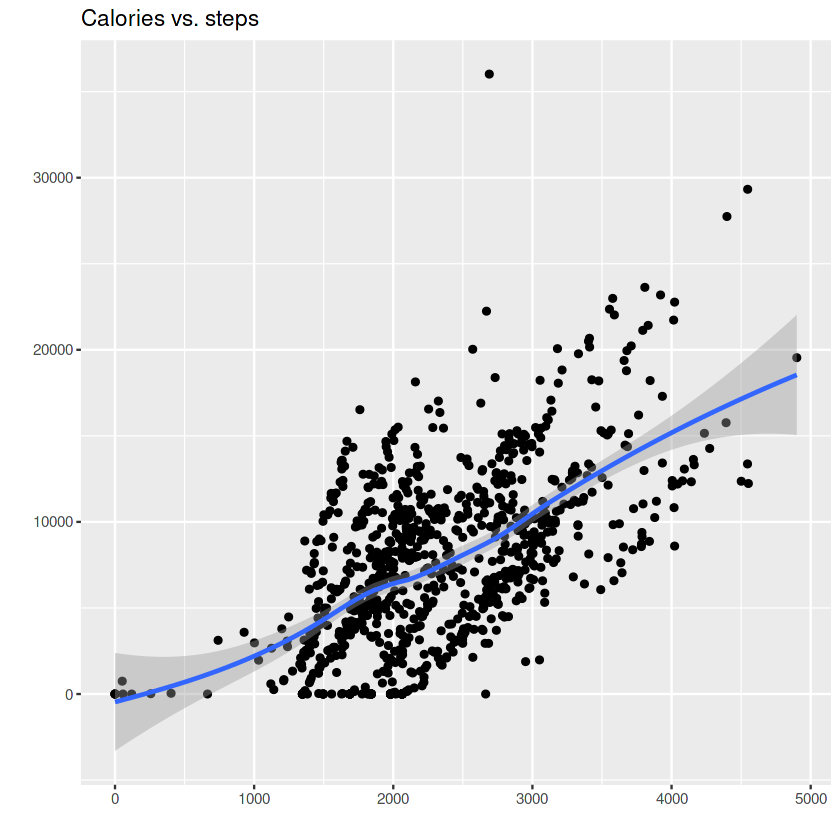

In [18]:
ggplot(daily_activity,mapping=aes(x=calories,y=total_steps)) + geom_point() + geom_smooth() + labs(title = "Calories vs. steps", x="", y="")

Ups, it seems that there is no such an obvious correlation between these variables. Let´s check the correlation between theses variables:

In [19]:
cor(daily_activity$calories,daily_activity$total_distance)

[1] 0.6449619

Maybe, if I could label the activity based on the total steps the relationship could be better.

Based on an australian organization called 1.000 steps (www.10000steps.org.au) you can label the activity day based on the steps made using the following scale:
 
* Sedentary is less than 5,000 steps per day.
* Low active is 5,000 to 7,499 steps per day.
* Somewhat active is 7,500 to 9,999 steps per day.
* Active is more than 10,000 steps per day.
* Highly active is more than 12,500.

In [20]:
daily_activity <- daily_activity %>% mutate(activity_label = case_when (
    total_steps > 12500 ~ "Highly active", 
    total_steps > 10000 ~ "Active",
    total_steps > 7500 ~ "Somewhat active",
    total_steps > 5000 ~ "Low active",
    total_steps <= 5000 ~ "Sedentary"))

head(daily_activity)

id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,activity_label
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,Highly active
1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,Active
1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776,Active
1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,Somewhat active
1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,Highly active
1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,Somewhat active


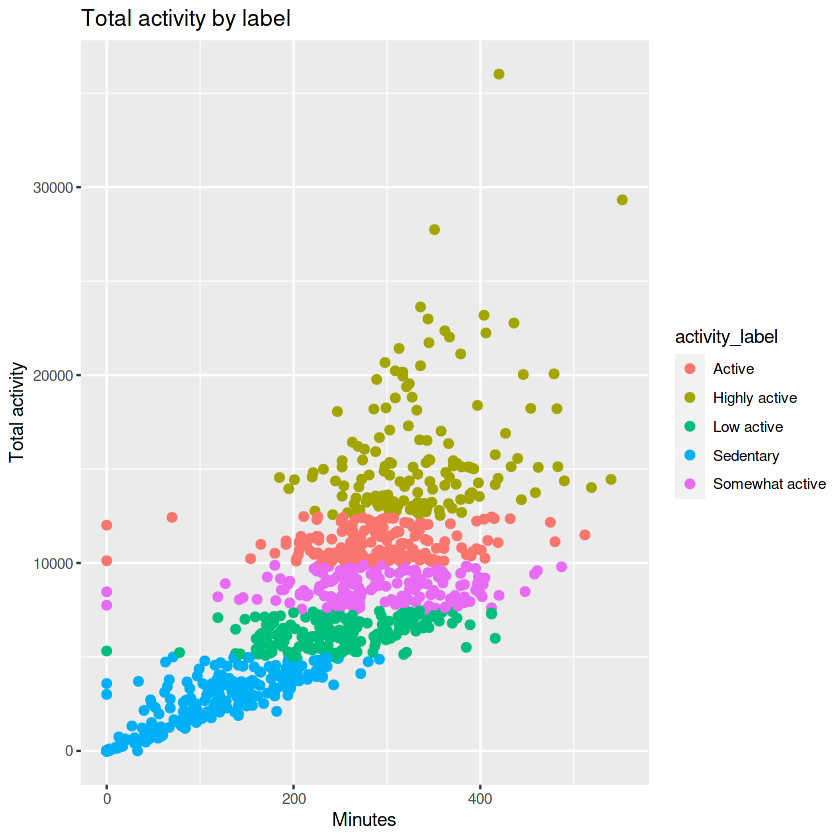

In [21]:
daily_activity <- daily_activity %>% mutate(total_active_minutes=very_active_minutes+fairly_active_minutes+lightly_active_minutes)

ggplot(daily_activity,mapping=aes(x=total_active_minutes,y=total_steps,color=activity_label)) + geom_point(size=2) + labs(title = "Total activity by label", x="Minutes", y="Total activity")

In order to get a better understanding of the activity label as a hole of the sample, let´s plot a pie chart:

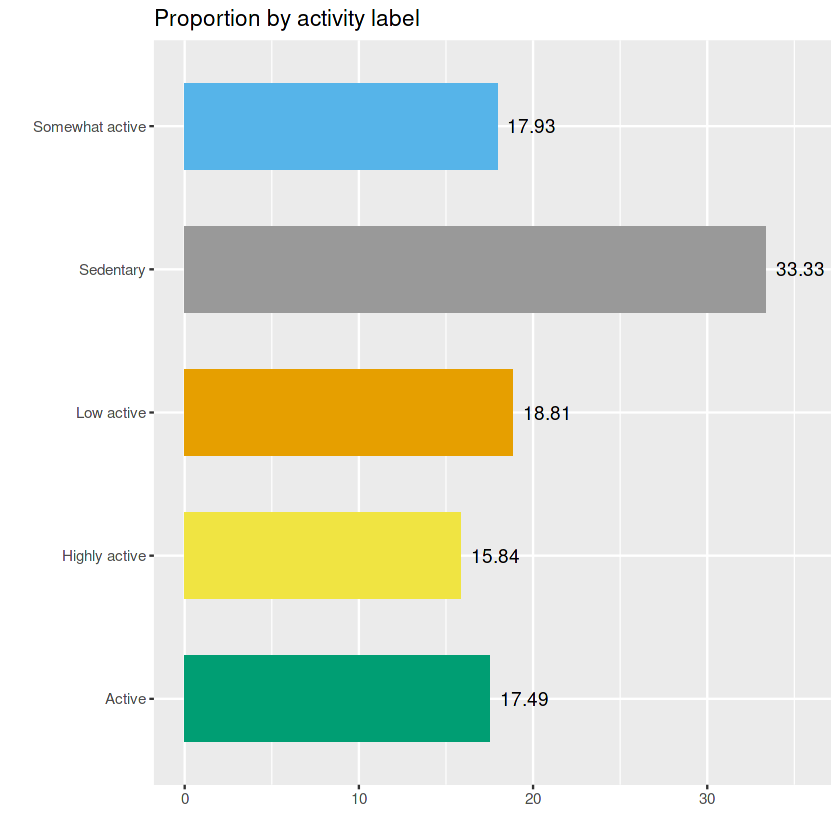

In [22]:
library(RColorBrewer)

pie_chart <- daily_activity %>% mutate(proportion=1/940) %>% group_by(activity_label) %>% summarize(proportion_activiy_label=sum(round(proportion,4)*100))

etiquetas <- paste0(pie_chart$activity_label, " = ", round(pie_chart$proportion_activiy_label, 4)*100, "%")

pie_chart <- pie_chart %>% arrange(-proportion_activiy_label) 

cbPalette <- c("#999999", "#E69F00", "#56B4E9", "#009E73", "#F0E442")

ggplot(pie_chart, aes(x=activity_label, y=proportion_activiy_label)) + geom_bar(fill=cbPalette,stat = "identity",width = 0.6) + coord_flip() + labs(title = "Proportion by activity label", x="", y="") + geom_text(aes(label = proportion_activiy_label), data = pie_chart,nudge_y = 2)

Now, let´s check some statics related to the total_steps per day:

Statics,Values_steps
<chr>,<table>
Min.,0
1st Quarter,3790
Median,7406
Mean,7638
3rd Quarter,10727
Max.,36019


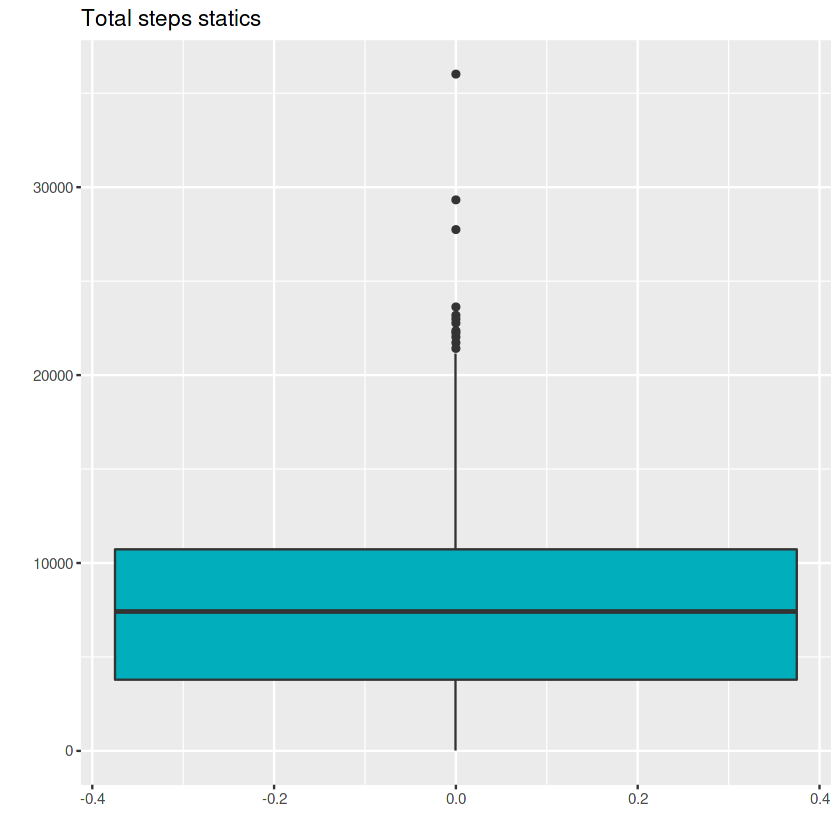

In [23]:
ggplot(daily_activity,mapping=aes(x=total_steps)) + geom_boxplot(fill="#00AFBB",) + labs(title = "Total steps statics", x="", y="") + coord_flip()

Values_steps <- summary(daily_activity$total_steps)

Statics <- c("Min.","1st Quarter","Median","Mean","3rd Quarter","Max.")

resume_steps <- tibble(Statics,Values_steps)
resume_steps

Using the hourly_acitivy dataset, I want to kno how the distribution of the activity through the day and by hour looks like:

In [24]:
hourly_activy <- hourly_activy %>% mutate(day=wday(hourly_activy$activity_date, label = TRUE, abbr = FALSE))

hourly_activy <- hourly_activy %>% mutate(hour=hour(hourly_activy$activity_date))

head(hourly_activy)

,id,activity_date,calories,total_intensity,average_intensity,step_total,day,hour
,<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<ord>,<int>
1,1503960366,2016-04-12 00:00:00,81,20,0.333333,373,Tuesday,0
2,1503960366,2016-04-12 01:00:00,61,8,0.133333,160,Tuesday,1
3,1503960366,2016-04-12 02:00:00,59,7,0.116667,151,Tuesday,2
4,1503960366,2016-04-12 03:00:00,47,0,0.000000,0,Tuesday,3
5,1503960366,2016-04-12 04:00:00,48,0,0.000000,0,Tuesday,4
6,1503960366,2016-04-12 05:00:00,48,0,0.000000,0,Tuesday,5


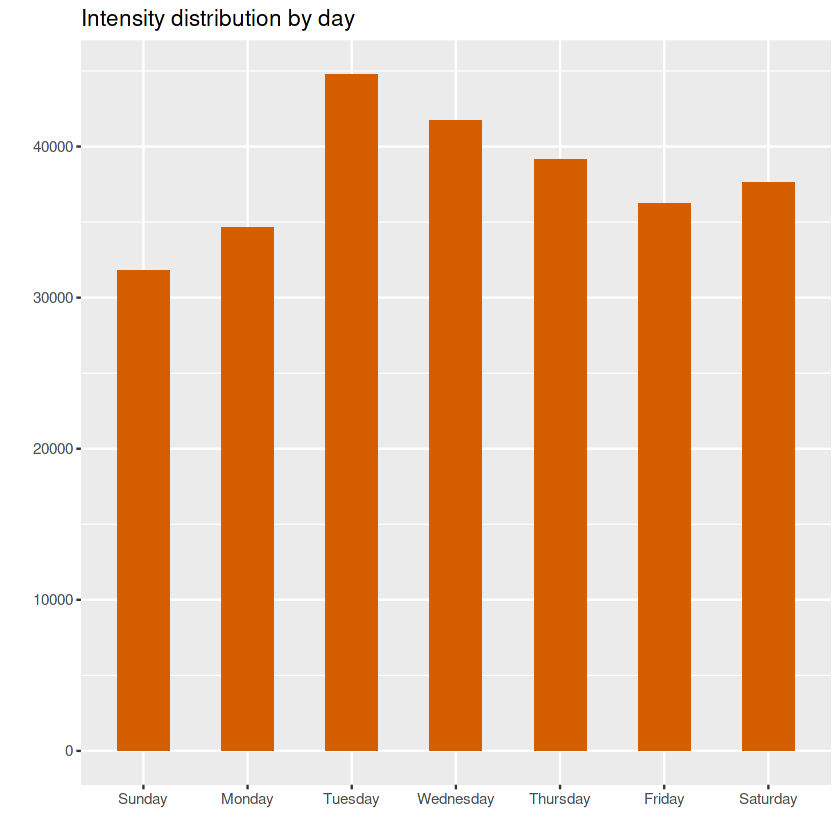

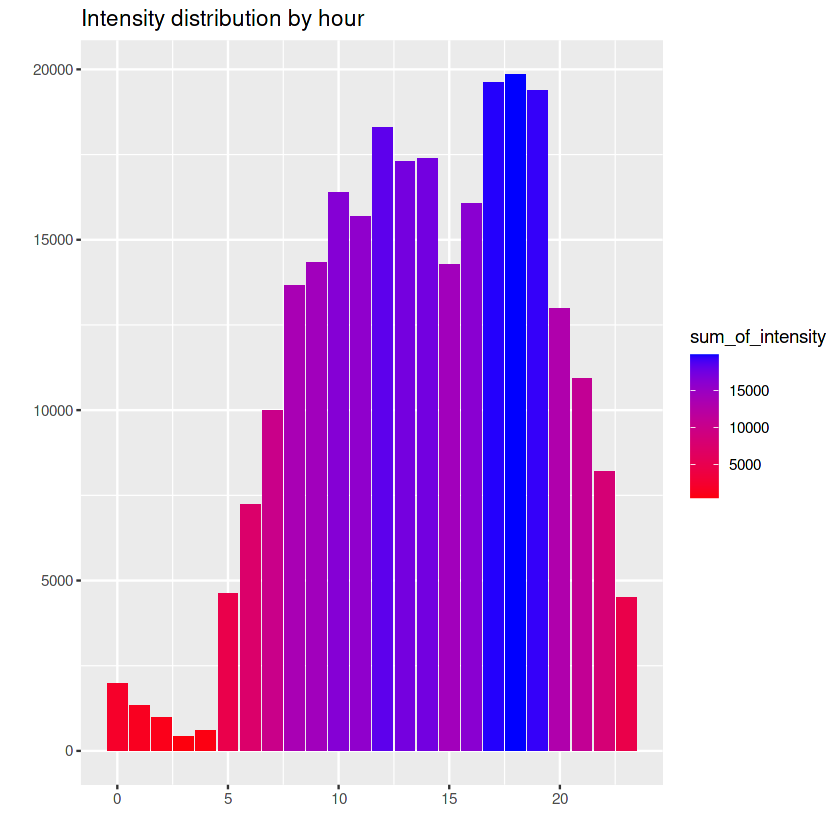

In [25]:
gradient <- hourly_activy %>% group_by(hour) %>% mutate(sum_of_intensity = sum(total_intensity))
                                                        
ggplot(hourly_activy, aes(x=day, y=total_intensity)) + geom_bar(fill="#D55E00",stat = "identity",width=0.5) + labs(title = "Intensity distribution by day", x="", y="")

ggplot(gradient, aes(x=hour, y=total_intensity)) + geom_bar(stat = "identity",aes(fill = sum_of_intensity)) + labs(title = "Intensity distribution by hour", x="", y="") + scale_fill_gradient2(low='black', mid='red', high='blue')

ijlkj

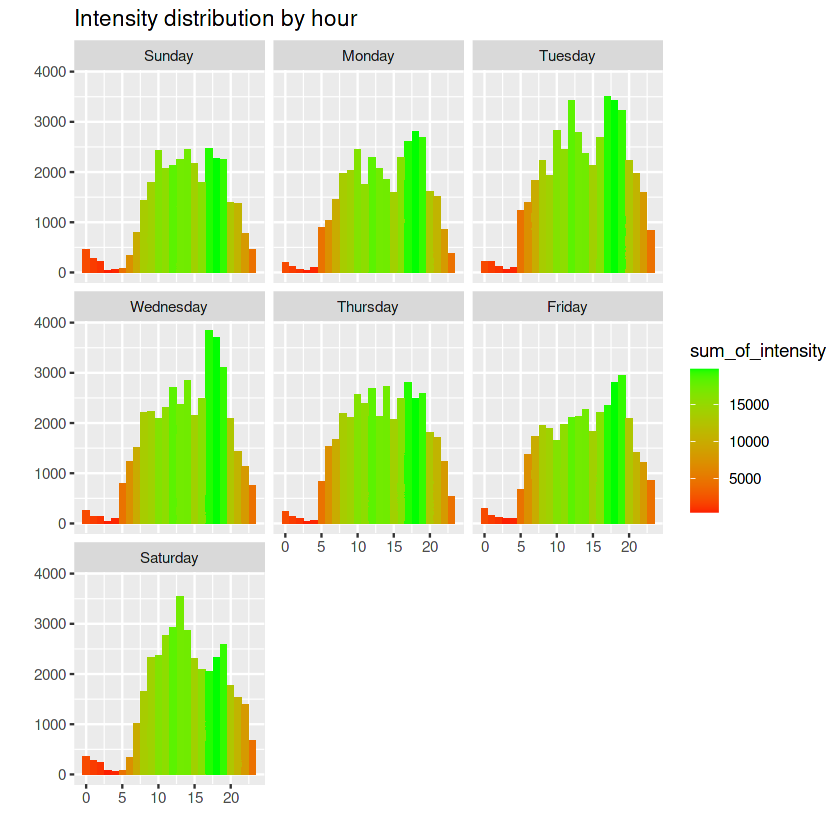

In [26]:
ggplot(gradient, aes(x=hour, y=total_intensity)) + geom_bar(stat = "identity",aes(fill = sum_of_intensity)) + labs(title = "Intensity distribution by hour", x="", y="") + scale_fill_gradient2(low='black', mid='red', high='green') + facet_wrap(~day)

Now let´s check the sleep dataset.

In [27]:
head(sleep_day)

id,activity_date,total_sleep_records,total_minutes_asleep,total_time_in_bed
<dbl>,<date>,<dbl>,<dbl>,<dbl>
1503960366,2016-04-12,1,327,346
1503960366,2016-04-13,2,384,407
1503960366,2016-04-15,1,412,442
1503960366,2016-04-16,2,340,367
1503960366,2016-04-17,1,700,712
1503960366,2016-04-19,1,304,320


The first thing I wonder is if people go to bed in order to get some sleep or get distracted by the cellphone or TV.

Statics,Values
<chr>,<table>
Min.,0.00
1st Quarter,17.00
Median,25.50
Mean,39.31
3rd Quarter,40.00
Max.,371.00


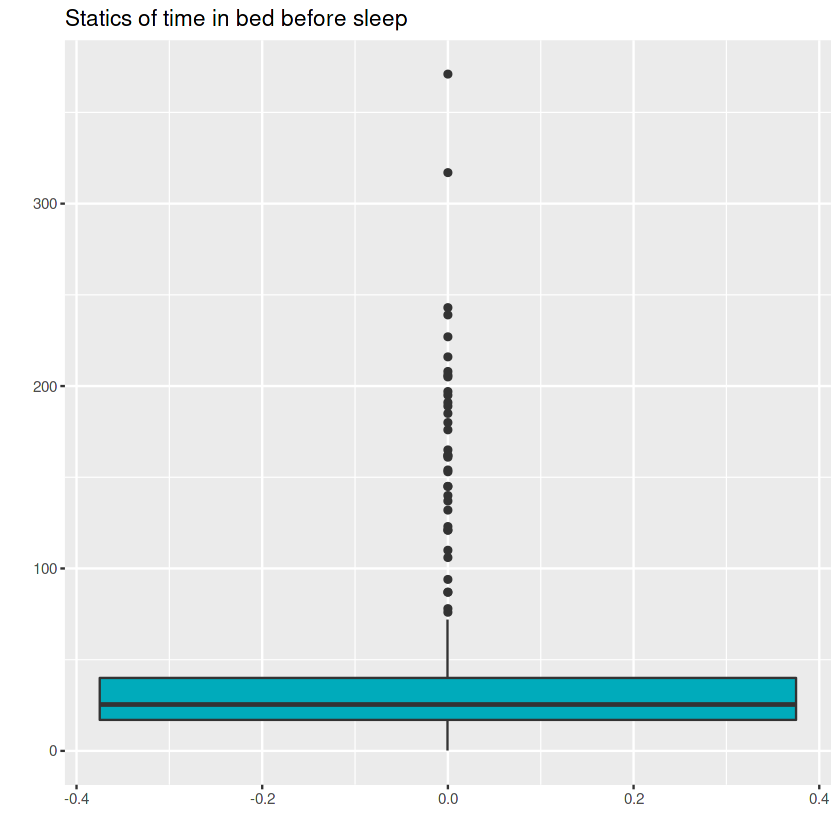

In [28]:
sleep_day <- sleep_day %>% mutate(time_in_bed_before_sleep=total_time_in_bed-total_minutes_asleep)

ggplot(sleep_day,mapping=aes(x=time_in_bed_before_sleep)) + geom_boxplot(fill="#00ABBB",) + labs(title = "Statics of time in bed before sleep", x="", y="") + coord_flip()

Values <- summary(sleep_day$time_in_bed_before_sleep)

resume <- tibble(Statics,Values)

resume

According to the Sleep fountation (https://www.sleepfoundation.org/) the recommended sleep time differs from the age range and goes from 7 to 17 hours like newborns. I supposed that all the people of the sample are adult so it is recommended that the sleep from 7 to 9 hours per day. Let´s check it:

id,activity_date,total_sleep_records,total_minutes_asleep,total_time_in_bed,time_in_bed_before_sleep,total_hours_asleep
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,2016-04-12,1,327,346,19,5.45
1503960366,2016-04-13,2,384,407,23,6.40
1503960366,2016-04-15,1,412,442,30,6.87
1503960366,2016-04-16,2,340,367,27,5.67
1503960366,2016-04-17,1,700,712,12,11.67
1503960366,2016-04-19,1,304,320,16,5.07


Statics,Values_total_hours_asleep
<chr>,<table>
Min.,0.970
1st Quarter,6.020
Median,7.210
Mean,6.987
3rd Quarter,8.170
Max.,13.270


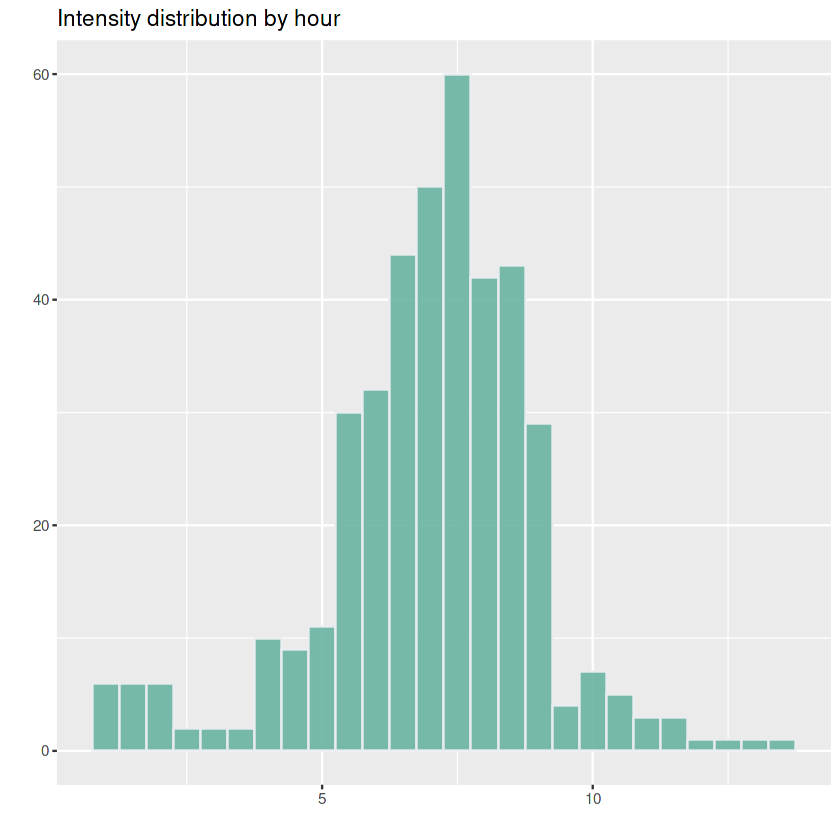

In [29]:
sleep_day <- sleep_day %>% mutate(total_hours_asleep=round(total_minutes_asleep/60,2)) 
head(sleep_day)

ggplot(sleep_day,mapping = aes(x=total_hours_asleep))+geom_histogram(fill="#69b3a2", color="#e9ecef", alpha=0.9,binwidth=0.5) + labs(title = "Intensity distribution by hour", x="", y="")

Values_total_hours_asleep <- summary(sleep_day$total_hours_asleep)

resume_asleep <- tibble(Statics,Values_total_hours_asleep)

resume_asleep

Based on the median, the people of the sample are sleeping the minimum recomended.

## 5 Act phase

Now it's time to propose some strategies in order to achieve Bellabeat main goal: Make growthing marketing strategies based on data-driven decisions.

Based on the graphs I can conclude the following:

* People temp to be more sedentary than active.
* The 52% of the time, people of the sample are low active or sedentary and only 17% of the time are active.
* Checking the mean and the median of the steps per day of the sample, I can conclude that people temp to be low active according to the 1.000 steps australian organization
* Based on the activity intensity records counting by day, It can be demostrated that Sundays has the lowest intensity followed by Mondays. By the other hand, Tuesday and Wednesday are the highest ones.
* The intensity distribution by hour shows that the highest levels are between the 17 and 19 pm. Then, the insity es drastically reduced after 20 pm. This behaviour is repeated every day, except on Saturdays when the highest intensity level is reached at 13 pm.
* The median shows that people spend around 26 minutes in bed before getting asleep. Based on the Healthline Media company (https://www.healthline.com/health/healthy-sleep/how-long-does-it-take-to-fall-asleep#normal-sleep) an adult is expected to fall asleep within 10 and 20 minutes so this shows that the people of the sample might being distracted by the cell phone or Tv.
* People sleep around 7 hours per day which is the minimum recomended by the Sleep foundation.The histogram shows that the records before 7 o'clock are greater than those above 7 which shows that people tempt to sleep less than 7 hours.

My growth marketing strategies for Bellabeat are:

* Send daily alerts in order to persuade people to get into movement for being more active
* Make a network so the Bellabeat users can share their health achievements like daily steps and sleep insights with friends and fellows. 
* Encourage users in order to be more active by a points-based rewards program. In this line, users could reach more points if they get more active on Sundays and Mondays and if they do excercise after 19 pm.
* As the histogram of the sleep records shows that people tempt to sleep less than 7 hours rather than 8 or more, Bellabeat could send alerts in order to improve the sleep time with benefits and healthy tips of sleeping longer.
* The last thing I recomend is that Bellabeat could send notifications showing the benefits of going to bed reducing the time looking at cellphone or TV.


Hope you enjoy!!